In [59]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Predicting Listing Gains in the Indian IPO Market

In this project, we are interested in investing the Initial Public Offerings (IPO) in the Indian market. Our goal is to build a deep learning classification model to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

The dataset we'll be using for this project contains information on past IPOs in the Indian market and comes from [moneycontrol](https://www.moneycontrol.com/ipo/listed-ipos/?classic=true). The dataset contains **319 observations** of **9 variables**.

The data consists of the following columns :

* `Date`: date when the IPO was listed

* `IPOName`: name of the IPO

* `Issue_Size`: size of the IPO issue, in INR Crores

* `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

* `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

* `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

* `Subscription_Total`: total number of times the IPO was subscribed overall

* `Issue_Price`: the price in INR at which the IPO was issued

* `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Indian_IPO_Market_Data.csv")

In [3]:
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [5]:
df['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [6]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


In [7]:
df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent']>0,1,0)

In [8]:
print(df.columns)

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')


In [9]:
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82,1
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21,0
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13,1
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28,0
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20,0


In [11]:
percent_missing = (df.isnull().sum() / len(df)) * 100
print(percent_missing)

Date                     0.0
IPOName                  0.0
Issue_Size               0.0
Subscription_QIB         0.0
Subscription_HNI         0.0
Subscription_RII         0.0
Subscription_Total       0.0
Issue_Price              0.0
Listing_Gains_Percent    0.0
Listing_Gains_Profit     0.0
dtype: float64


There is no missing values.

In [12]:
df = df.drop(['IPOName'], axis = 1)

In [13]:
print(df.columns)

Index(['Date ', 'Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')


In [14]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: Listing_Gains_Profit, dtype: float64

## Data Visualizations

54.55 % of the IPOs were listed at a profit.

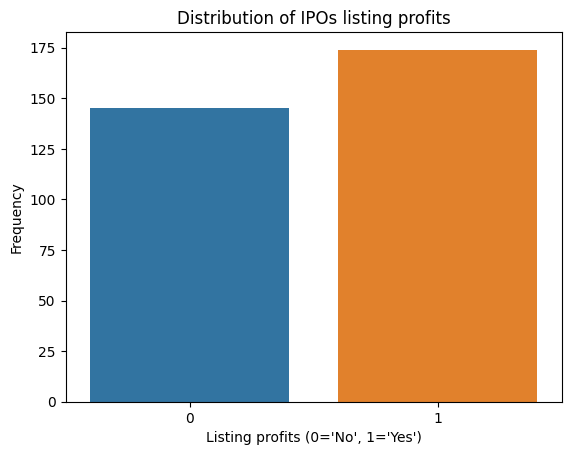

In [15]:
sns.countplot(data=df, x='Listing_Gains_Profit').set(
    title = "Distribution of IPOs listing profits",
    xlabel = "Listing profits (0='No', 1='Yes')",
    ylabel = "Frequency")
plt.show()

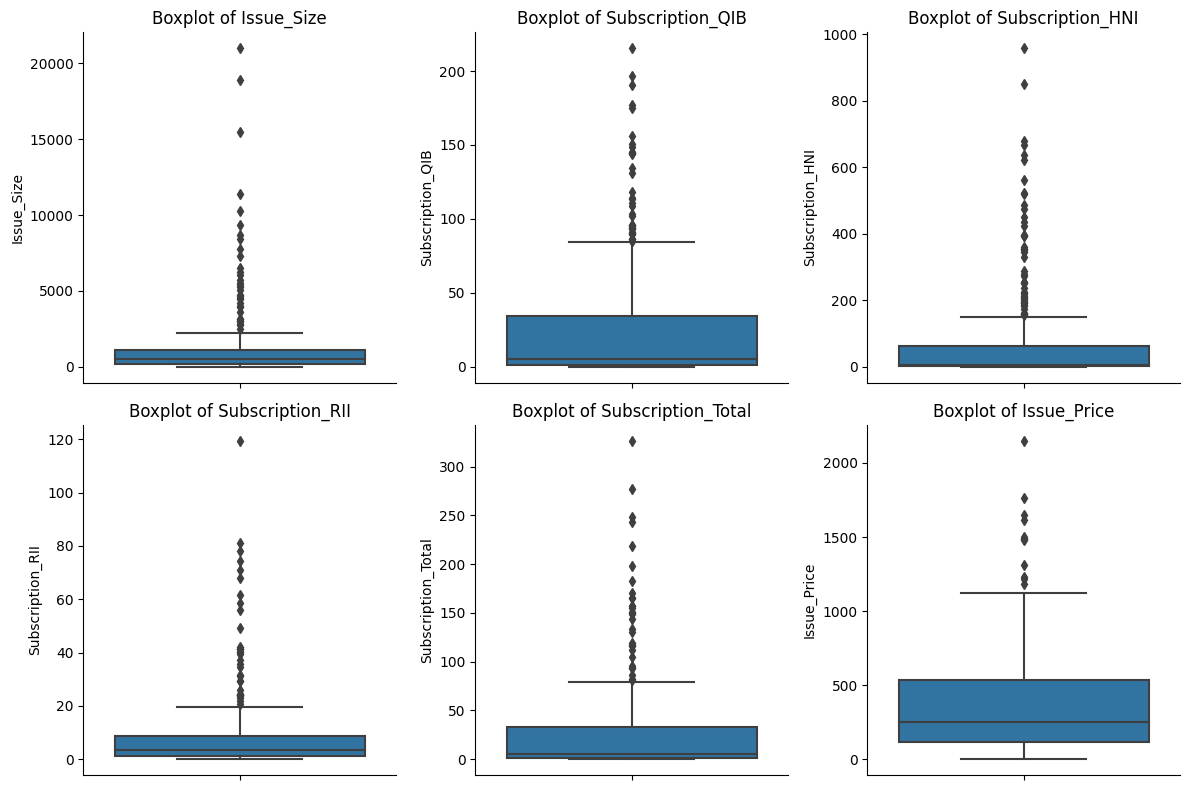

In [22]:
# List of continuous variables
continuous_variables = ['Issue_Size' , 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

# Define the size of the subplot grid
num_rows = 2
num_cols = 3

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each continuous variable and create a boxplot
for i, var in enumerate(continuous_variables, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y = var, data = df)
    plt.title(f'Boxplot of {var}')
    
# Adjust layout and display the plot
sns.despine()
plt.tight_layout()

**Observations :** There are a few outliers in all the continuous variables.

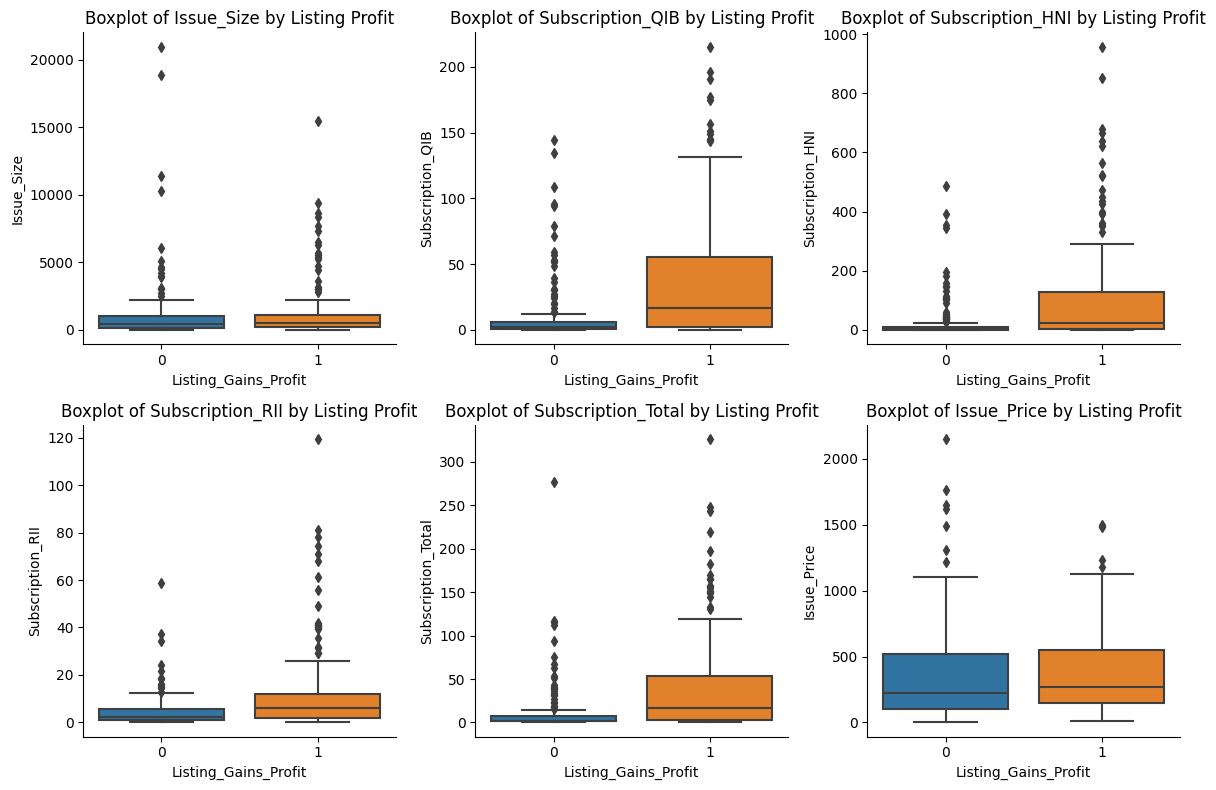

In [25]:
predictor_variables = ['Issue_Size','Subscription_QIB', 'Subscription_HNI', 'Subscription_RII' , 'Subscription_Total', 'Issue_Price']

#Define the layout of the subplot grid
num_rows = 2
num_cols = 3

#Create a figure
plt.figure(figsize=(12,8))

for i, var in enumerate(predictor_variables, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=var, x='Listing_Gains_Profit')
    plt.title(f'Boxplot of {var} by Listing Profit')
    
sns.despine()
plt.tight_layout()

**Observations :** It seems that higher subscriptions, particularly QIB and HNI subscriptions are associated with listing gains profits.

/tmp/ipykernel_64/719577507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


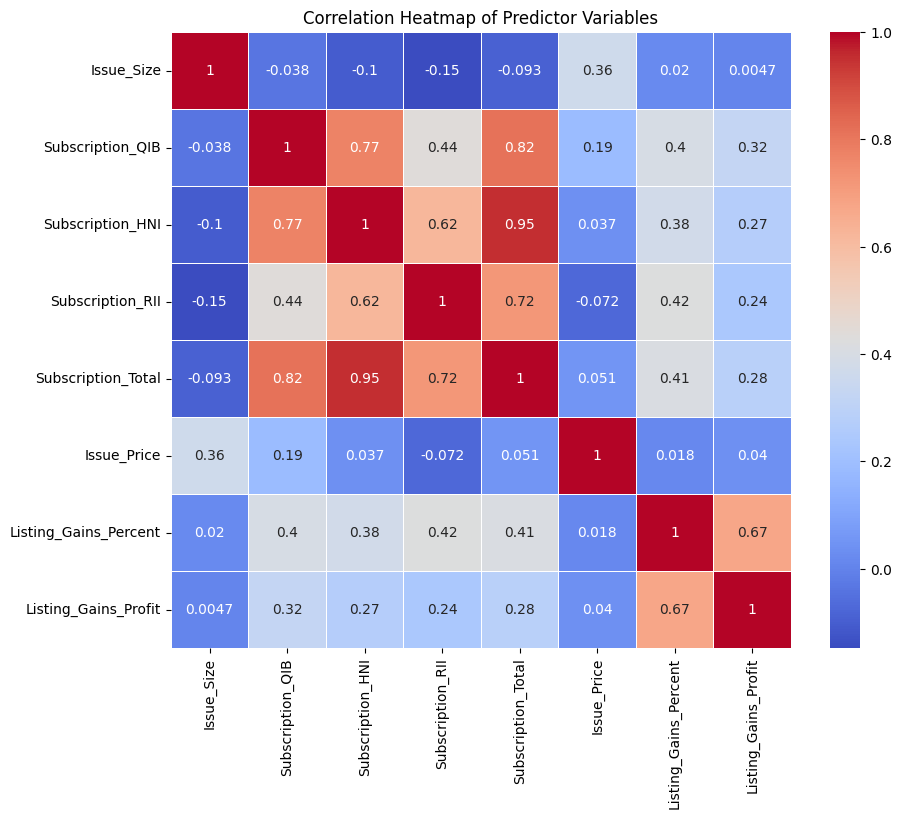

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

**Observations :** 
* There are some strong correlations between Subscription_Total and the following variables in decreasing order :
    - Subscription_HNI (High Networth Individuals), **0.95** ;
    - Subscription_QIB (Qualified Institutional Buyers), **(0.82)** ;
    - Subscription_RII (Retail Individual Investors), **(0.72)**.
<br>
* There is a strong correlation between Subscription_QIB and Subscription_HNI **(0.77)**.

## Data Preparation

In [31]:
df.skew(numeric_only = True)

Issue_Size               4.853402
Subscription_QIB         2.143705
Subscription_HNI         3.078445
Subscription_RII         3.708274
Subscription_Total       2.911907
Issue_Price              1.696881
Listing_Gains_Percent    0.821566
Listing_Gains_Profit    -0.183438
dtype: float64

**Observations :** The following variables contain outliers :

* Issue_Size ;
* Subscription_HNI (High Networth Individuals) ;
* Subscription_QIB (Qualified Institutional Buyers) ;
* Subscription_RII (Retail Individual Investors) ;
* Subscription_Total ;
* Issue_Price.

<br>
We  will replace the outliers using the lower and upper bounds of the IQR.

In [41]:
skewness = df.skew(numeric_only=True)

var_with_outliers = list(skewness[abs(skewness) > 1].index)

for var in var_with_outliers:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    df[var] = np.where(df[var] < lower, lower, df[var])
    df[var] = np.where(df[var] > upper, upper, df[var])


In [42]:
df.skew(numeric_only=True)

/tmp/ipykernel_64/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Issue_Size               1.224620
Subscription_QIB         1.262734
Subscription_HNI         1.181636
Subscription_RII         1.129171
Subscription_Total       1.293880
Issue_Price              1.084722
Listing_Gains_Percent    0.821566
Listing_Gains_Profit    -0.183438
dtype: float64

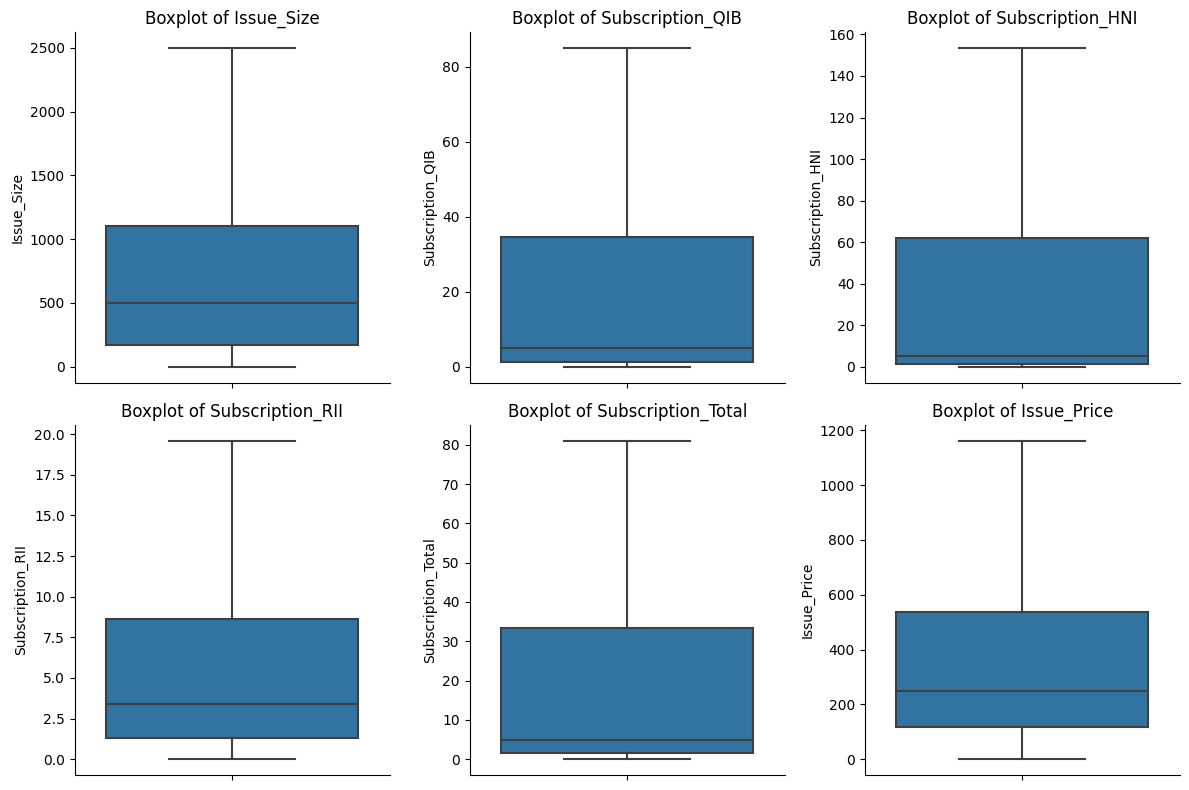

In [43]:
# Define the size of the subplot grid
num_rows = 2
num_cols = 3

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each continuous variable and create a boxplot
for i, var in enumerate(var_with_outliers, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y = var, data = df)
    plt.title(f'Boxplot of {var}')
    
# Adjust layout and display the plot
sns.despine()
plt.tight_layout()

**Observations :** We removed the outliers using the Interquartile Range Method. As the graph above shows, there is no more outliers. 

In [44]:
df = df.drop(['Date '], axis = 1)

print(df.columns)
print(df.shape)

Index(['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')
(319, 8)


In [46]:
target_variable = ['Listing_Gains_Profit']

predictors = list(set(list(df.columns)) - set(target_variable))

print(predictors)

['Issue_Price', 'Subscription_RII', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_Total', 'Issue_Size', 'Listing_Gains_Percent']


In [47]:
#Normalize the predictors

df[predictors] = df[predictors] / df[predictors].max()

In [49]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.311793,0.017540,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.268853,0.176224,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.359283,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.102454,-0.042733,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.215239,0.006694,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.461472,0.093602,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations :** We have normalized the data using minmax.

In [50]:
#Seperate predictors and target variables
X = df[predictors].values
y = df[target_variable].values

#Split the data into test and train sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

(223, 7)
(96, 7)


**Observations :** We have split the data into a training and test set using a test set size of 30% of the dataset.

## Deep Learning Model

### Sequential Model

In [52]:
#Define the model
model = tf.keras.Sequential()


model.add(tf.keras.layers.Dense(
    64,
    input_shape = (X_train.shape[1],),
    activation = 'elu'))

model.add(tf.keras.layers.Dense(
    32,
    activation = 'elu'))

model.add(tf.keras.layers.Dense(
    16,
    activation = 'elu'))

model.add(tf.keras.layers.Dense(
    4,
    activation = 'elu'))

#Sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(
    1,
    activation = 'sigmoid'))

#Setup optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1)
metrics = ['accuracy']
loss = 'binary_crossentropy'

model.compile(
    optimizer = optimizer,
    metrics = metrics,
    loss = loss)

2024-04-04 08:47:20.926384: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-04-04 08:47:20.926696: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.199.2 does not match DSO version 470.161.3 -- cannot find working devices in this configuration


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train, y_train, epochs = 150, verbose = 0)

In [57]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6592
[0.5981931090354919, 0.6591928005218506]
3/3 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6250
[0.6198264360427856, 0.625]


In [60]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

3/3 [==============================] - 0s 2ms/step
0.13917844378886213
0.10626988095884848


In [61]:
model2 = tf.keras.Sequential()


model2.add(tf.keras.layers.Dense(
    64,
    input_shape = (X_train.shape[1],),
    activation = 'elu'))

model2.add(tf.keras.layers.Dense(
    32,
    activation = 'relu'))

model2.add(tf.keras.layers.Dense(
    16,
    activation = 'relu'))

model2.add(tf.keras.layers.Dense(
    4,
    activation = 'relu'))

#Sigmoid activation for binary classification
model2.add(tf.keras.layers.Dense(
    1,
    activation = 'sigmoid'))

#Setup optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1)
metrics = ['accuracy']
loss = 'binary_crossentropy'

model2.compile(
    optimizer = optimizer,
    metrics = metrics,
    loss = loss)

In [62]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________


In [63]:
model2.fit(X_train, y_train, epochs = 150, verbose = 0)
print(model2.evaluate(X_train,y_train))
print(model2.evaluate(X_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5561
[0.6868839263916016, 0.5560538172721863]
3/3 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5208
[0.6942295432090759, 0.5208333134651184]


In [65]:
#Define the model
model = tf.keras.Sequential()


model.add(tf.keras.layers.Dense(
    64,
    input_shape = (X_train.shape[1],),
    activation = 'relu'))

model.add(tf.keras.layers.Dense(
    32,
    activation = 'relu'))

model.add(tf.keras.layers.Dense(
    16,
    activation = 'relu'))

model.add(tf.keras.layers.Dense(
    4,
    activation = 'relu'))

#Sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(
    1,
    activation = 'sigmoid'))

#Setup optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1)
metrics = ['accuracy']
loss = 'binary_crossentropy'

model.compile(
    optimizer = optimizer,
    metrics = metrics,
    loss = loss)

In [66]:
model.fit(X_train, y_train, epochs = 150, verbose = 0)
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9821
[0.03659334406256676, 0.9820627570152283]
3/3 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9896
[0.023045772686600685, 0.9895833134651184]


**Observations :** The rELU activation function yields better performance results. The accuracy is consistent.

* Training Accuracy : 98.2 % ;
* Test Accuracy : 98.9 %

In [67]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

3/3 [==============================] - 0s 2ms/step
0.9539184841130048
0.9697780175029077


## Conclusion

In this project, we have built Deep Learning Classification models using the deep learning framework, Keras, in TensorFlow. We used a real-world IPO dataset and built a classifier algorithm to predict whether an IPO will list at profit or not.

We used the Sequential API to build the model. The architecture of our final model consists of :
* One (01) input layer ;
* Four (04) hidden layers using ReLU as the activation function and containing 64, 32, 16 and 4 nodes respectively ;
* One output layer with one node and a sigmoid activation function.

Our model was compiled with an Adam optimizer and a learning rate of **0.1**. The accuracy was 98.2% and 98.9% on training and test data, respectively. We see that the accuracy is consistent across the training and test datasets, which indicates that there is no significant signs of overfitting.